In [84]:
import numpy as np 
import matplotlib.pyplot as plt 
import time

Load the training set

In [87]:
train_data = np.load('train_data.npy') 
train_labels = np.load('train_labels.npy')

In [89]:
test_data = np.load('test_data.npy') 
test_labels = np.load('test_labels.npy')

Print out data dimensions

In [92]:
print("Training dataset dimensions: ", np.shape(train_data)) 
print("Number of training labels: ", len(train_labels)) 
print("Testing dataset dimensions: ", np.shape(test_data)) 
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (7500, 784)
Number of training labels:  7500
Testing dataset dimensions:  (1000, 784)
Number of testing labels:  1000


In [94]:
## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels[1:], return_counts = True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

Training set distribution:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 749}


Visualizing the Train Data

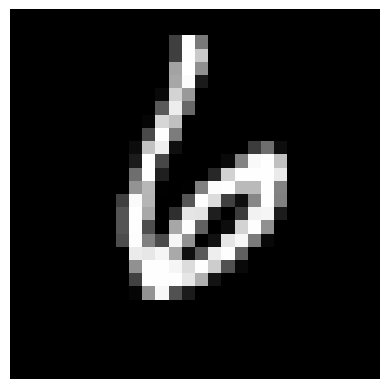

Label 6


In [97]:
## Define a function that displays a digit given its vector representation
def show_digit(x):
    plt.axis("off")
    x = np.asarray(list(map(int, x)))
    plt.imshow(x.reshape((28,28)), cmap = plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if (dataset=='train'):
        show_digit(train_data[index,])
        label = train_labels[index]
        print("Label "+ str(label))
    else:
        show_digit(test_data[index,])
        #label = test_labels[index]
    #print("Label "+ str(label))
    return

## View the first data point in the training set
vis_image(56, "train")

In [99]:
##computes squared euclidean distance between two vectors
def squared_dist(x, y):
    x = np.asarray(list(map(float, x)))
    y = np.asarray(list(map(float, y)))
    return np.sum(np.square(x-y))

## Compute distance between a six and a two in our training set
print ("Distance from 6 to 2: ", squared_dist(train_data[266,],train_data[22,]))

Distance from 6 to 2:  7094737.0


Computing nearest neighbours

A sample case:
NN classification:  2
The test image: 


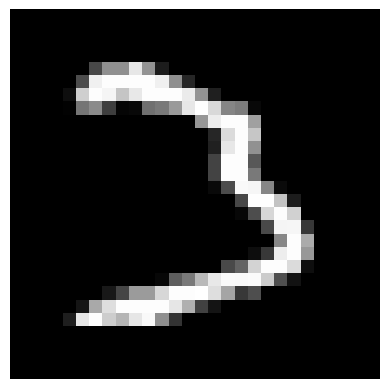

The corresponding nearest neighbour image: 


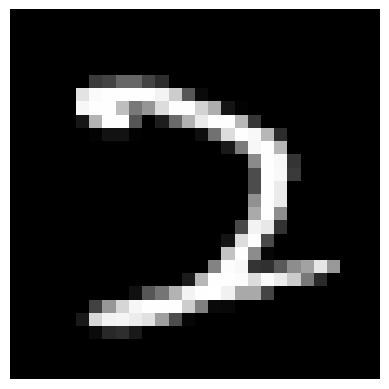

Label 2


In [102]:
## Takes a vector x and returns the index of its nearest neighbour in train_data
def find_NN(x):
    #compute distances from x to every row in train_data
    distances = [squared_dist(x, train_data[i,]) for i in range(len(train_labels))]
    #Get the index of the smallest distance
    return np.argmin(distances)

## Takes a vector x and returns the class of its nearest neighbour in train_data
def NN_classifier(x):
    #Get the index of the nearest neighbour
    index = find_NN(x)
    # Return its class
    return train_labels[index]

## A sample case
print ("A sample case:")
print ("NN classification: ", NN_classifier(test_data[39,]))
print ("The test image: ")
vis_image(39, "test")

print ("The corresponding nearest neighbour image: ")
vis_image(find_NN(test_data[39,]), "train")

Fastest nearest neighbour methods

In [105]:
## Predict on each test data point (and time it!)
t_before = time.time()
test_predictions = [NN_classifier(test_data[i,]) for i in range(10)]
t_after = time.time()

## Compute the error
#err_positions = np.not_equal(test_predictions, test_labels)
#error = float(np.sum(err_positions))/len(test_labels)

#print("Error of nearest neighbor classifier: ", error)
print("Classification time (seconds): ", t_after - t_before)

Classification time (seconds):  17.54998469352722


In [107]:
#6. Faster nearest neighbor methods from sklearn.neighbors 
from sklearn.neighbors import BallTree 
# Build nearest neighbor structure on training data 
t_before = time.time() 
ball_tree = BallTree(train_data) 
t_after = time.time() 
# Compute training time 
t_training = t_after - t_before 
print("Time to build data structure (seconds): ", t_training) 
# Get nearest neighbor predictions on testing data 
t_before = time.time() 
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False)) 
ball_tree_predictions = train_labels[test_neighbors] 
t_after = time.time() 
# Compute testing time 
t_testing = t_after - t_before 
print("Time to classify test set (seconds): ", t_testing) 
# Verify that the predictions are the same 
print("Ball tree produces same predictions as above? ", np.array_equal(test_predictions, ball_tree_predictions)) 
from sklearn.neighbors import KDTree 
# Build nearest neighbor structure on training data 
t_before = time.time() 
kd_tree = KDTree(train_data) 
t_after = time.time() 
# Compute training time

Time to build data structure (seconds):  0.7390508651733398
Time to classify test set (seconds):  6.338969945907593
Ball tree produces same predictions as above?  False


In [ ]:
t_training = t_after - t_before 
print("Time to build data structure (seconds): ", t_training) 
# Get nearest neighbor predictions on testing data 
t_before = time.time() 
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False)) 
kd_tree_predictions = train_labels[test_neighbors] 
t_after = time.time() 
# Compute testing time 
t_testing = t_after - t_before 
print("Time to classify test set (seconds): ", t_testing) 
# Verify that the predictions are the same 
print("KD tree produces same predictions as above? ", 
np.array_equal(test_predictions, kd_tree_predictions))

Time to build data structure (seconds):  1.2611908912658691
